## Load stuff

In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches
from matplotlib import ticker

from HiC_GenomeObject2 import HiC_genomeObject
import numpy as np
import pandas as pd
import os
import re
import pickle

%matplotlib inline

# for making PDF files
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "DejaVu Sans"
plt.rcParams['font.family'] = "sans-serif"
# plt.rcParams['font.size'] = 20


# genome information
genbankfile = './genome_info/NC_022898.gbk'
operonfile = ('./genome_info/All_transcription_units_of_B._subtilis_PY79_BioSubCyc.csv')

self = HiC_genomeObject()
self.set_chromosome_length(4033459)
self.load_genBank_annotation(genbankfile)
self.load_operonStructure(operonfile)

# load data 
data_dir = './data/'
data_info = pd.read_excel('./data/Data_info.xls') 
data_info.sort_values('ParS position (bp)',inplace=True)

for idx in range(len(data_info)): 
    key = data_info['key'].iloc[idx] # get the preferred the name for referencing the data 
    hic_file_name = os.path.join(data_dir,data_info['filename'].iloc[idx]) 
    self.load_text_HiC_Map(hic_file_name,key=key) # load the Hi-C file
    self.set_parS_sites(key,[data_info['ParS position (bp)'].iloc[idx]]) # set locations of the parS sites

# prepares a Pandas DataFrame for calculating extrusion trajectories
self.computeDScore()


In [2]:
import re
def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower() 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)    
# https://stackoverflow.com/questions/4836710/does-python-have-a-built-in-function-for-string-natural-sort

In [3]:
desired_files = ['+4.','-59','+26.','-27.','+91.']

## Plot goodness of fit surfaces of the "mixing model"

done 0
done 1
done 2
done 3
done 4
done 5


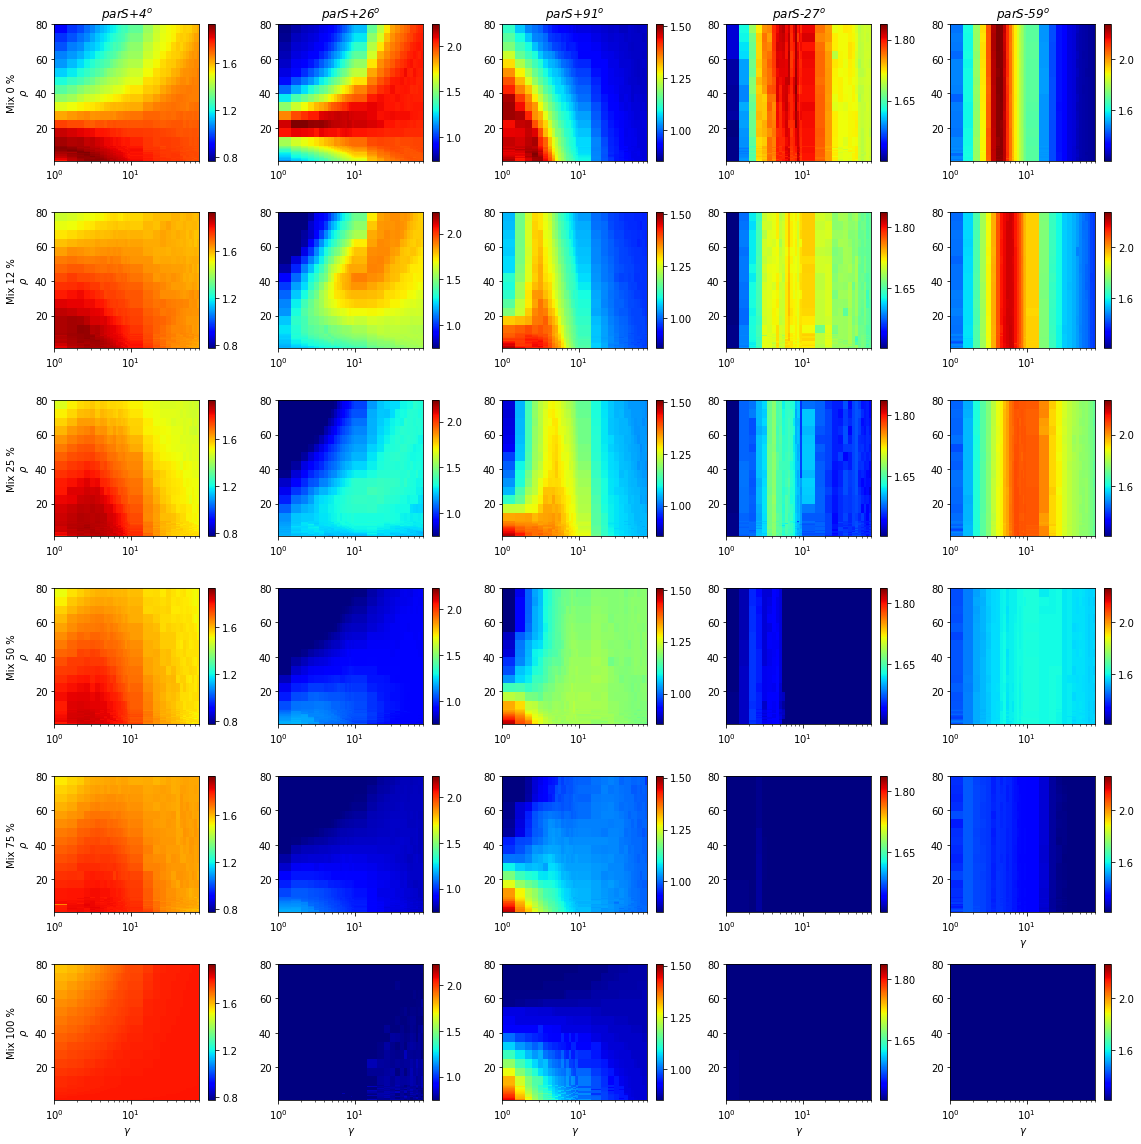

In [4]:
# get CMAX
mix_vals = [0,0.125,0.25,0.5,0.75,1]


savefolder = './optimization_data/'
mix = 0
mix_files = natural_sort([x for x in os.listdir(savefolder) if ('Mix' in x) and ('{}_'.format(mix) in x) and ('ChIP' not in x) \
                          and ('.pkl' in x) and any([y in x for y in desired_files]) ])
cmax = {}
cmin = {}
optimum = {}
keep_max = {}
for fi,f in enumerate(mix_files):
    df = pickle.load(open(os.path.join(savefolder,f),'rb') )
    key = f.split('_')[-1][:-4]
    rho_vals =df['rho_vals']
    gamma_vals=df['gamma_vals'] 
    hiSum_list=df['hiSum_list']
    keep_max[key] = np.max(df['hiNumPairs_list'])
    cmax[key] = np.max(hiSum_list/keep_max[key])
    cmin[key] = np.min(hiSum_list/keep_max[key])

gs = GridSpec(len(mix_vals),len(mix_files))
plt.figure(figsize=(16,16))

count = 0
for mi,mix in enumerate(mix_vals):
    print('done {}'.format(mi))

    mix_files = natural_sort([x for x in os.listdir(savefolder) if ('Mix' in x) and ('{}_'.format(mix) in x) and ('ChIP' not in x) \
                              and ('.pkl' in x) and any([y in x for y in desired_files]) ])
    
    shapeNorm = hiSum_list.shape[0]*hiSum_list.shape[1]
    for fi,f in enumerate(mix_files):
        df = pickle.load(open(os.path.join(savefolder,f),'rb') )
   
        key = f.split('_')[-1][:-4]
        rho_vals =df['rho_vals']
        gamma_vals=df['gamma_vals'] 
        hiSum_list=df['hiSum_list']
        normVal = keep_max[key]
    
        ax = plt.subplot(gs[count])
        ax.set_xscale('log')
        #ax.set_yscale('log')
        
        plt.pcolor(gamma_vals,rho_vals,hiSum_list/normVal, cmap='jet', vmax=cmax[key],vmin=cmin[key])
        cbar = plt.colorbar()
        tick_locator = ticker.MaxNLocator(nbins=3)
        cbar.locator = tick_locator
        cbar.update_ticks()
        
        if count >= (len(mix_vals)*len(mix_files))-len(mix_vals):
            plt.xlabel(r'$\gamma$')
            
        if np.mod(count,len(mix_files))==0:
            plt.ylabel(r"Mix {} %" "\n" r"$\rho$".format( int(mix*100) ) )
                       
        if count<len(mix_files):
            if key == 'parS+91+4':
                key = 'parS+4'
            plt.title( key+r"$^o$" , style='italic') 
        rho_idx, gam_idx = np.unravel_index(np.argmax(hiSum_list/normVal),hiSum_list.shape)

        count +=1
        
        plt.xlim([1,80])
        plt.ylim([1,80])

plt.tight_layout()
plt.draw()
plt.show()

## For paper - plot best solutions of "mixing model"

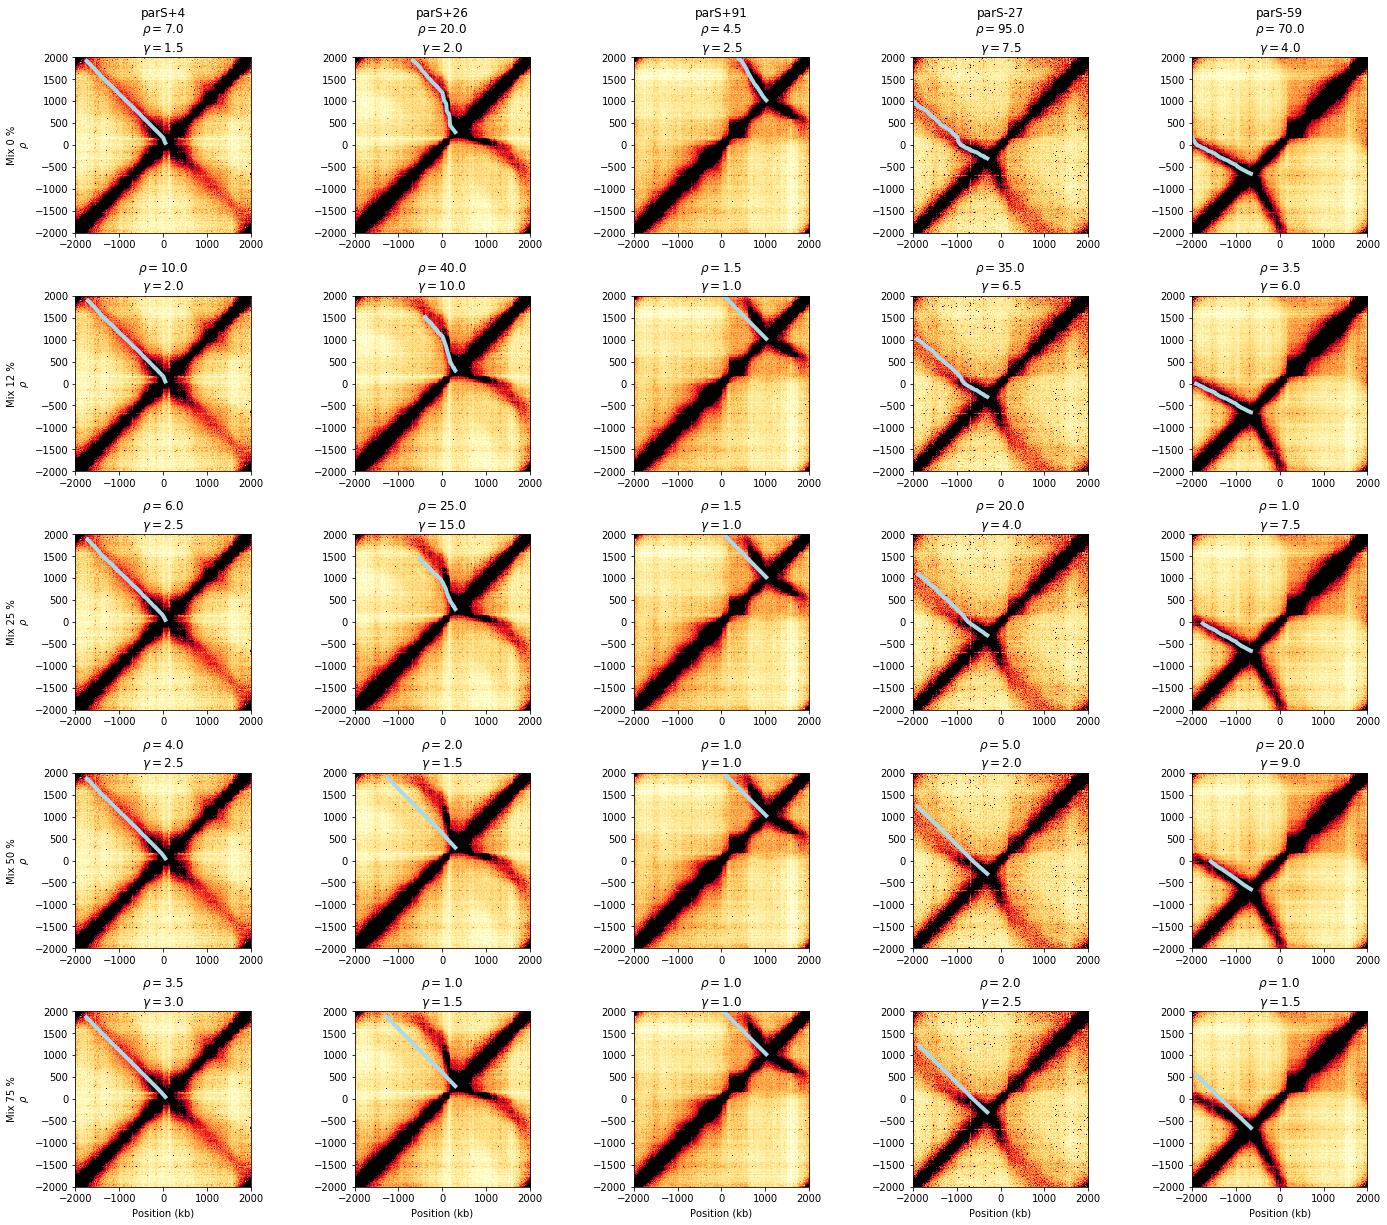

In [5]:
# plot the best solutions
# get CMAX
mix = 0
mix_files = natural_sort([x for x in os.listdir(savefolder) if ('Mix' in x)  and ('ChIP' not in x) and ('{}_'.format(mix) in x)\
                          and ('.pkl' in x) and any([y in x for y in desired_files]) ])
cmax = {}
cmin = {}
optimum = {}
for fi,f in enumerate(mix_files):
    df = pickle.load(open(os.path.join(savefolder,f),'rb') )
    key = f.split('_')[-1][:-4]
    rho_vals =df['rho_vals']
    gamma_vals=df['gamma_vals'] 
    hiSum_list=df['hiSum_list']
    cmax[key] = np.max(hiSum_list/np.max(df['hiNumPairs_list']))
    cmin[key] = np.min(hiSum_list/np.max(df['hiNumPairs_list']))


from matplotlib.gridspec import GridSpec
gs = GridSpec(len(mix_vals),len(mix_files))
plt.figure(figsize=(20,20))


count = 0
# for mi,mix in enumerate([0.25,0.5,0.75,1]):
mix_vals = [0,0.125,0.25,0.5,0.75]
for mi,mix in enumerate(mix_vals):

    mix_files = natural_sort([x for x in os.listdir(savefolder) if ('Mix' in x) and ('ChIP' not in x) and ('{}_'.format(mix) in x)\
                              and ('.pkl' in x) and any([y in x for y in desired_files]) ])
    for fi,f in enumerate(mix_files):
        df = pickle.load(open(os.path.join(savefolder,f),'rb') )
   
        key = f.split('_')[-1][:-4]
        rho_vals =df['rho_vals']
        gamma_vals=df['gamma_vals'] 
        hiSum_list=df['hiSum_list']

        ax = plt.subplot(gs[count]); 
        rho_idx, gam_idx = np.unravel_index(np.argmax(hiSum_list),hiSum_list.shape)

        if count >= (len(mix_vals)*len(mix_files))-5:
            plt.xlabel('Position (kb)')
        if np.mod(count,len(mix_files))==0:
            plt.ylabel("Mix {} %" "\n" r"$\rho$".format( int(mix*100) ) )
                       
        self.show_heatmap(key,vmax=0.005,cmap='fall',showShifted=True)

        alpha = gamma_vals[gam_idx]
        rB = rho_vals[rho_idx]
        tB = rB

        L = self.HiC_genomDict['chrmLen']
        parS_list = self.HiC_genomDict[key].parS
        frac_to_ter = np.abs(L//2-parS_list[0])/(L/2)
        time = 38*60*frac_to_ter
        
        self.doExtrusionTraceByStep(key,mix,alpha,rB,tB,substeps=1e4,showShifted=True,
                    doPeriodic=True,chip_key='',showPlot=True,timeCutoff=time)

        plt.ylim([-2000,2000])
        plt.xlim([-2000,2000])  
        
        if count<len(mix_files):
            plt.title(key+"\n" + r"$\rho ={}$" "\n" "$\gamma={}$".format(rB,alpha) )          
        else:
            plt.title(r"$\rho ={}$" "\n" "$\gamma={}$".format(rB,alpha)   )  
        count +=1
          
plt.tight_layout()
